### Задание №1: Фильтр Блума

##### 1. Реализация фильтра Блума

In [17]:
import hashlib

class BloomFilter:
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = [0] * size

    def _hash(self, item, seed):
        hash_value = int(hashlib.md5((str(item) + str(seed)).encode()).hexdigest(), 16)
        return hash_value % self.size

    def add(self, item):
        for seed in range(self.hash_count):
            index = self._hash(item, seed)
            self.bit_array[index] = 1

    def __contains__(self, item):
        for seed in range(self.hash_count):
            index = self._hash(item, seed)
            if self.bit_array[index] == 0:
                return False
        return True

bloom = BloomFilter(size=100, hash_count=3)
bloom.add("a")
bloom.add("b")

print("a" in bloom)  
print("c" in bloom)  

True
False


##### 2. Определение процента ложноположительных срабатываний

In [18]:
def false_positive_rate(bloom, test_items, actual_items):
    false_positives = 0
    for item in test_items:
        if item in bloom and item not in actual_items:
            false_positives += 1
    return false_positives / len(test_items)

actual_items = ["a", "b", "c"]
test_items = ["a", "b", "c", "d", "e", "f"]

bloom = BloomFilter(size=100, hash_count=3)
for item in actual_items:
    bloom.add(item)

rate = false_positive_rate(bloom, test_items, actual_items)
print(f"Процент ложноположительных срабатываний: {rate * 100:.2f}%")

Процент ложноположительных срабатываний: 0.00%


##### 3. Оценка зависимости ложноположительных срабатываний от размерности массива и числа хеш-функций


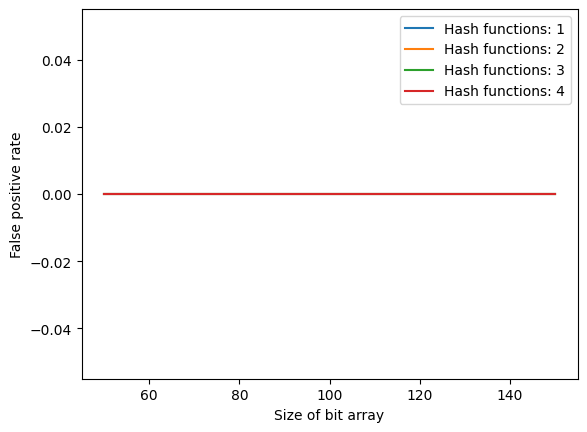

In [19]:
import matplotlib.pyplot as plt

def evaluate_bloom_filter(size_range, hash_count_range, actual_items, test_items):
    results = []
    for size in size_range:
        for hash_count in hash_count_range:
            bloom = BloomFilter(size=size, hash_count=hash_count)
            for item in actual_items:
                bloom.add(item)
            rate = false_positive_rate(bloom, test_items, actual_items)
            results.append((size, hash_count, rate))
    return results

size_range = range(50, 200, 50)
hash_count_range = range(1, 5)
actual_items = ["a", "b", "c"]
test_items = ["a", "b", "c", "d", "e", "f"]

results = evaluate_bloom_filter(size_range, hash_count_range, actual_items, test_items)

for hash_count in hash_count_range:
    x = [size for size, hc, rate in results if hc == hash_count]
    y = [rate for size, hc, rate in results if hc == hash_count]
    plt.plot(x, y, label=f"Hash functions: {hash_count}")

plt.xlabel("Size of bit array")
plt.ylabel("False positive rate")
plt.legend()
plt.show()